# **Phase 4: Depression**
---
### *recessions*: monetary policy still effective 
- 2 Quarters of Negative GDP Growth 
##### **Depressions**: monetary policy no longer effective -> move onto other means 
- Risk-Free Interest Rate already close to 0%
    - *cases with great currency outflows/currency weakness*: floor on interest rates higher because of credit/currency risk considerations 
- Credit Spreads are Wide (amount that high-risk IR are greater than risk-free IR)
- Defaults and Restructurings *start* with High Risk (more levered = more at risk)

> ### Policy Maker Levers:
> 1. Austerity (printing less - deflationary)
> 2. Debt Defaults/Restructurings (deflationary)
> 3. Central Bank "Printing Money" and Making Purchases/Providing Garuntees (inflationary)
> 4. Transfers of Money/Credit from the haves to the have nots 

### Downward "Debt Death Spiral": 
- Risk-Free IR at Floor -> Risky IR making debts expensive to service 
    - IR cuts only help lending institutions with liquidity problems 
- Austerity and Defaults/Restructurings Dominate (deflationary forces)
    - Hit Banks Hard (highly levered) 
    - create market fear -> potential runs on financial institutions that won't be able to meet capital requirements without government help
    - *Depressions are NOT Psychological*: 
- Stimulative/Inflationary Forces of "Printing Money" **NOT** Balancing Out
    - printing money to cover runs or allow defaults (lender of last resort)
- High Ratio of `Financial_Assets : Money` = Liquidity Crisis (who will you sell to?)
    - unregulated *shadow banking* products/instruments 

> ### Solvency Problem: Broke
> - according to accounting standards: entitiy does not have enough capital to operate 
> - resolve via providing *equity capital* or *changing accounting rules through monetary policy* 
>   - EX.) **Mark-to-Market Accounting**: fair value asset pricing for assets with changing values 
> 
> ### Cash-Flow Problems: *RUN*
> - entity does not have enough cash to meet obligations -> immediate and severe 
> - can have adequate capital, but capital tied up in illiquid assets 
> - *resolve* by fiscal/monetary policy with capital injections or garuntees that will resolve 

### Deleveraging Dynamic: 
- Driven by Supply and Demand of/Relationships Between **credit, money, goods, and services**
    - Credit is *NOT* Fungible Money -> a Promise to Pay in the Future 




In [ ]:
# Nominal Short Rate Graph 
# Equity Price Graph 
# Household Debt as % of Net Worth Graph 
# USA 3yr Money Growth (%GDP annual)
# US Net Wealth Shares 
# https://fred.stlouisfed.org/series/DGS2
# https://fred.stlouisfed.org/series/T10Y2Y
# https://fred.stlouisfed.org/categories/33446
# https://www.investopedia.com/terms/n/nominalinterestrate.asp
# https://fred.stlouisfed.org/series/GDP/
# https://fred.stlouisfed.org/series/CPIAUCSL
# https://fredaccount.stlouisfed.org/public/datalist/707


# END OF DEPRESSION
### Nominal Growth rate above the nominal interest rate 

# write-down of asset value impacts (pg. 30, paragraph 2)

#### import [d_cycle.py](d_cycle.py) and `fredapi` 

In [6]:
import os
import d_cycle as dc
from fredapi import Fred

api_key = os.environ.get("FRED_API_KEY")
fred = Fred(api_key=api_key)


## Recession: Monetary Policy Still Effective 
---
- 2+ Consecutive Quarters of negative GDP Growth 


In [7]:
try1 = dc.GDP_MEASUREMENTS(cycle_start=dc.start_2008, cycle_end=dc.end_2008)

recession, start_4 = try1.gdp_recession()
print(f'Rough start of Recession: {start_4} \n Start Technically After Two Quarters of Negative GDP Growth')
recession

Rough start of Recession: 2008-01-01 
 Start Technically After Two Quarters of Negative GDP Growth


,GDP,fedfunds,GDP_qoq_growth,GDP_change,fedfunds_change
2008-01-01,14706.538,3.18,-8.520,-0.000579,-0.293333
2008-10-01,14608.208,0.51,-290.791,-0.019517,-0.737113
2009-01-01,14430.901,0.18,-177.307,-0.012137,-0.647059
2009-04-01,14381.236,0.18,-49.665,-0.003442,0.000000


# Define the Depression Cycle
---

In [13]:
depression_cycle = dc.PLOTTING(start=start_4, end=dc.end_2008)

## Fed Funds Rate vs. GDP
---

# [Seaborn Docs](https://datagy.io/seaborn-line-plot/)

In [67]:
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='rainbow')

In [24]:
try2 = dc.GDP_MEASUREMENTS(cycle_start='2007-10-01', cycle_end=dc.end_2008)
df = try2.gdp_growth()

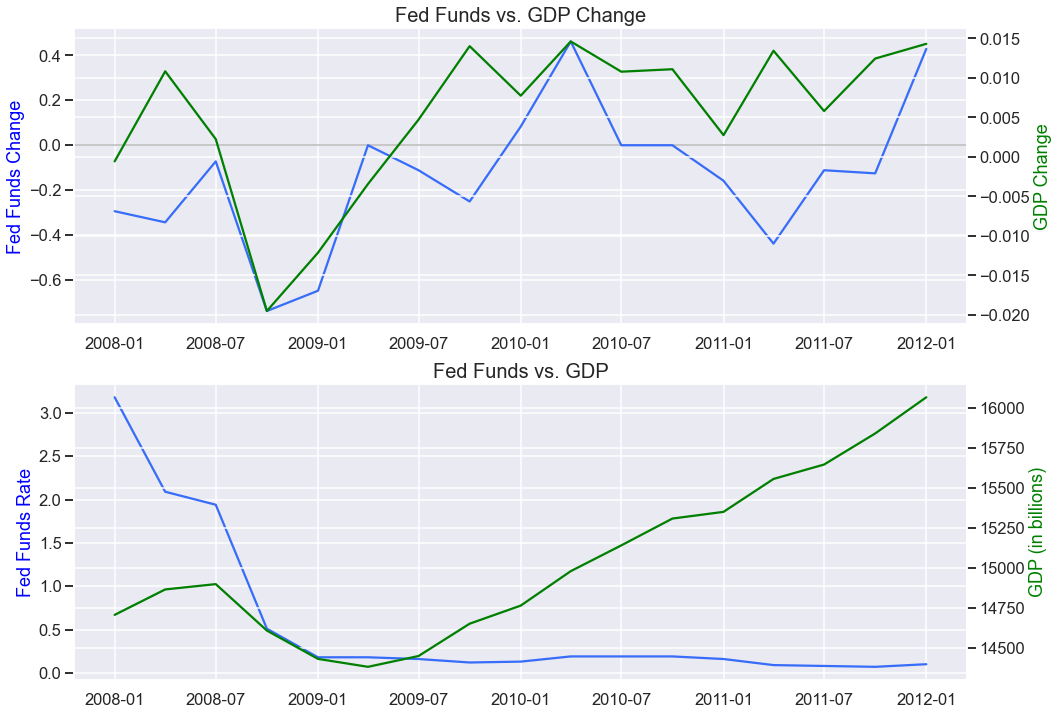

In [16]:
fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(16,12))

ax[0].set_title('Fed Funds vs. GDP Change', fontsize=20)
ax[0].axhline(y=0, color='black', linewidth=0.4)
ax[0].set_ylabel('Fed Funds Change', color='blue')
sns.lineplot(data=df, x=df.index, y='fedfunds_change', ax=ax[0])

ax2 = ax[0].twinx()
sns.lineplot(data=df, x=df.index, y='GDP_change', ax=ax2, color='green')
ax2.set_ylabel('GDP Change', color='green')


ax[1].set_title('Fed Funds vs. GDP', fontsize=20)
sns.lineplot(data=df, x=df.index, y='fedfunds', ax=ax[1])
ax[1].set_ylabel('Fed Funds Rate', color='blue')

ax3 = ax[1].twinx()
sns.lineplot(data=df, x=df.index, y='GDP', ax=ax3, color='green')
ax3.set_ylabel('GDP (in billions)', color='green')

plt.show()

# Equity Price (Indexed) 
---
- NASDAQ Composite Index 

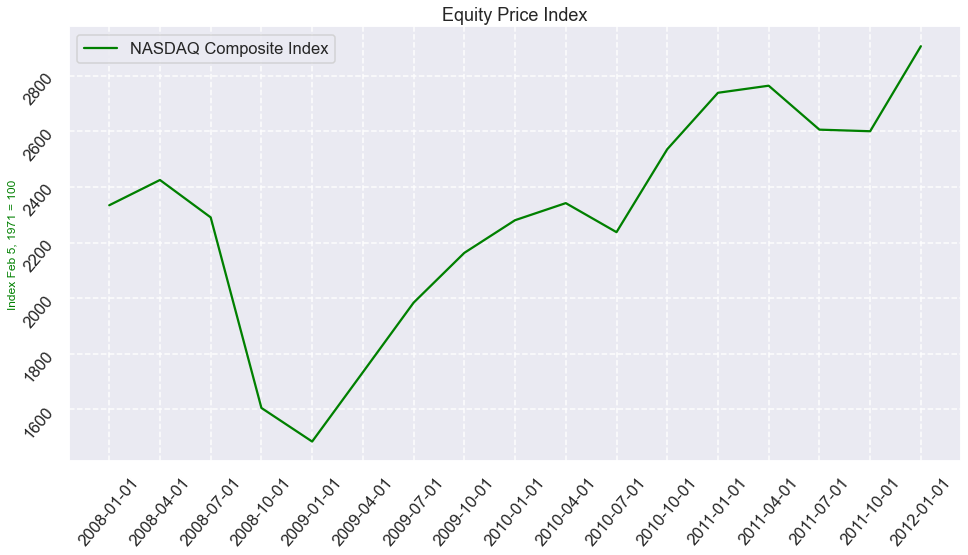

In [12]:
depression_cycle.plot_equity_price_index()

## US Short Term Interest Rates 
--- 
- Federal Funds Rate (Short-Term Nominal Interest Rate)
    - IR prior to inflation 
    - Fed Funds Rate = Basis for All Other IR

In [26]:
full_df = try1.gdp_growth()

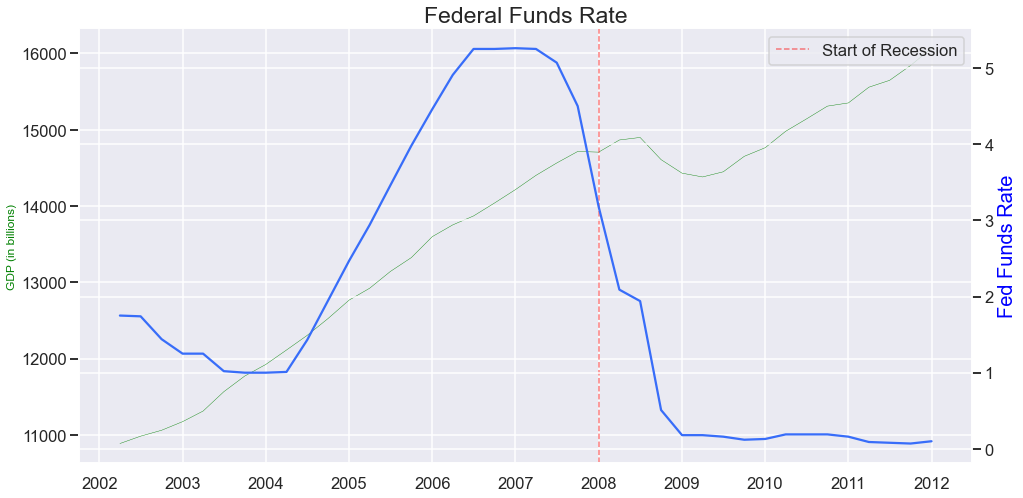

In [66]:
fig,ax = plt.subplots(figsize=(16,8))

starting = datetime.strptime(start_4, '%Y-%m-%d')

ax.set_title('Federal Funds Rate', fontsize=23)
sns.lineplot(data=full_df, x=full_df.index, y='GDP', ax=ax, color='green', linewidth=0.4)
ax.set_ylabel('GDP (in billions)', color='green', fontsize=12)
ax.axvline(x=starting, linestyle='--', linewidth=1.5, color='red', alpha=0.5, label='Start of Recession')
ax.legend(loc=1)

ax2 = ax.twinx()
sns.lineplot(data=full_df, x=full_df.index, y='fedfunds', ax=ax2)
ax2.set_ylabel('Fed Funds Rate', color='blue', fontsize=20)


plt.show()

## Household Debt as a % of Net Worth 
--- 

## US 3yr Money Growth (%GDP Ann)
---

## US Net Wealth Shares 
---